In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784',version=1,as_frame = False)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)

In [11]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,plot_roc_curve,plot_precision_recall_curve

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

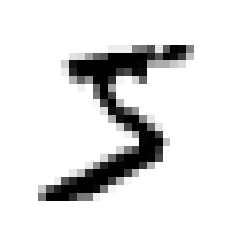

In [13]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [25]:
knn = KNeighborsClassifier()
knn.fit(X,y)

KNeighborsClassifier()

In [26]:
from joblib import load,dump
dump(knn,'MNIST-digits.joblib',compress=9)

['MNIST-digits.joblib']

In [27]:
xxx = load('MNIST-digits.joblib')

In [28]:
report(xxx)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.97      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.97      0.98      0.97      1028
           8       1.00      0.96      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [15]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(y_test,preds))

In [78]:
knn.predict([X[100]])

array([5], dtype=uint8)

In [80]:
report(knn)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [85]:
# Trying different parameters
import random
param_grid = {
    'n_neighbors':random.sample(range(5, 30), 10),'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'p':[1,2]
}

In [102]:
# from sklearn.model_selection import RandomizedSearchCV
# model = RandomizedSearchCV(knn,param_grid,verbose=2)
# model.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END algorithm=brute, n_jobs=-1, n_neighbors=6, p=1, weights=uniform; total time= 1.7min
[CV] END algorithm=brute, n_jobs=-1, n_neighbors=6, p=1, weights=uniform; total time= 1.7min
[CV] END algorithm=brute, n_jobs=-1, n_neighbors=6, p=1, weights=uniform; total time= 1.8min
[CV] END algorithm=brute, n_jobs=-1, n_neighbors=6, p=1, weights=uniform; total time= 1.8min
[CV] END algorithm=brute, n_jobs=-1, n_neighbors=6, p=1, weights=uniform; total time= 1.8min
[CV] END algorithm=auto, n_jobs=-1, n_neighbors=29, p=2, weights=distance; total time=  32.8s
[CV] END algorithm=auto, n_jobs=-1, n_neighbors=29, p=2, weights=distance; total time=  31.6s
[CV] END algorithm=auto, n_jobs=-1, n_neighbors=29, p=2, weights=distance; total time=  31.9s
[CV] END algorithm=auto, n_jobs=-1, n_neighbors=29, p=2, weights=distance; total time=  31.5s
[CV] END algorithm=auto, n_jobs=-1, n_neighbors=29, p=2, weights=distance; total time=  31.3s


--

/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/Use



--------------------------------------------------------------------------------
LokyProcess-13386 failed with traceback: 
--------------------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 195, in <module>
    process_obj = pickle.load(from_parent)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/queues.py", line 75, in __setstate__
    self._after_fork()
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 69, in _after_fork
    self._reset(after_fork=True)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 73, in _reset
    self._notempty._at_fork_reinit()
AttributeError: '_SafeQueue' object has no attribute '_notempty'


----------------------------------------------------

/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/Use



--------------------------------------------------------------------------------
LokyProcess-13396 failed with traceback: 
--------------------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 195, in <module>
    process_obj = pickle.load(from_parent)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/queues.py", line 75, in __setstate__
    self._after_fork()
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 69, in _after_fork
    self._reset(after_fork=True)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 73, in _reset
    self._notempty._at_fork_reinit()
AttributeError: '_SafeQueue' object has no attribute '_notempty'


----------------------------------------------------

/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/Use



--------------------------------------------------------------------------------
LokyProcess-13402 failed with traceback: 
--------------------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 195, in <module>
    process_obj = pickle.load(from_parent)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/queues.py", line 75, in __setstate__
    self._after_fork()
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 69, in _after_fork
    self._reset(after_fork=True)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 73, in _reset
    self._notempty._at_fork_reinit()
AttributeError: '_SafeQueue' object has no attribute '_notempty'


----------------------------------------------------

/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/Use



--------------------------------------------------------------------------------
LokyProcess-13409 failed with traceback: 
--------------------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 195, in <module>
    process_obj = pickle.load(from_parent)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/queues.py", line 75, in __setstate__
    self._after_fork()
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 69, in _after_fork
    self._reset(after_fork=True)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 73, in _reset
    self._notempty._at_fork_reinit()
AttributeError: '_SafeQueue' object has no attribute '_notempty'


----------------------------------------------------

/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/Use



--------------------------------------------------------------------------------
LokyProcess-13421 failed with traceback: 
--------------------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 195, in <module>
    process_obj = pickle.load(from_parent)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/queues.py", line 75, in __setstate__
    self._after_fork()
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 69, in _after_fork
    self._reset(after_fork=True)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 73, in _reset
    self._notempty._at_fork_reinit()
AttributeError: '_SafeQueue' object has no attribute '_notempty'


----------------------------------------------------

/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/Use



--------------------------------------------------------------------------------
LokyProcess-13425 failed with traceback: 
--------------------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 195, in <module>
    process_obj = pickle.load(from_parent)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/queues.py", line 75, in __setstate__
    self._after_fork()
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 69, in _after_fork
    self._reset(after_fork=True)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 73, in _reset
    self._notempty._at_fork_reinit()
AttributeError: '_SafeQueue' object has no attribute '_notempty'


----------------------------------------------------

/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/Use



--------------------------------------------------------------------------------
LokyProcess-13433 failed with traceback: 
--------------------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 195, in <module>
    process_obj = pickle.load(from_parent)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/queues.py", line 75, in __setstate__
    self._after_fork()
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 69, in _after_fork
    self._reset(after_fork=True)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 73, in _reset
    self._notempty._at_fork_reinit()
AttributeError: '_SafeQueue' object has no attribute '_notempty'


----------------------------------------------------

/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/Use



--------------------------------------------------------------------------------
LokyProcess-13441 failed with traceback: 
--------------------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 195, in <module>
    process_obj = pickle.load(from_parent)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/queues.py", line 75, in __setstate__
    self._after_fork()
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 69, in _after_fork
    self._reset(after_fork=True)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 73, in _reset
    self._notempty._at_fork_reinit()
AttributeError: '_SafeQueue' object has no attribute '_notempty'


----------------------------------------------------

/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/Use



--------------------------------------------------------------------------------
LokyProcess-13451 failed with traceback: 
--------------------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 195, in <module>
    process_obj = pickle.load(from_parent)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/queues.py", line 75, in __setstate__
    self._after_fork()
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 69, in _after_fork
    self._reset(after_fork=True)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 73, in _reset
    self._notempty._at_fork_reinit()
AttributeError: '_SafeQueue' object has no attribute '_notempty'


----------------------------------------------------

/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/Use

[CV] END algorithm=auto, n_jobs=-1, n_neighbors=23, p=2, weights=distance; total time=  31.2s
[CV] END algorithm=auto, n_jobs=-1, n_neighbors=23, p=2, weights=distance; total time=  31.4s
[CV] END algorithm=auto, n_jobs=-1, n_neighbors=23, p=2, weights=distance; total time=  33.0s
[CV] END algorithm=auto, n_jobs=-1, n_neighbors=23, p=2, weights=distance; total time=  32.3s
[CV] END algorithm=auto, n_jobs=-1, n_neighbors=23, p=2, weights=distance; total time=  32.1s
[CV] END algorithm=auto, n_jobs=-1, n_neighbors=6, p=1, weights=uniform; total time= 1.8min
[CV] END algorithm=auto, n_jobs=-1, n_neighbors=6, p=1, weights=uniform; total time= 1.9min
[CV] END algorithm=auto, n_jobs=-1, n_neighbors=6, p=1, weights=uniform; total time= 1.9min
[CV] END algorithm=auto, n_jobs=-1, n_neighbors=6, p=1, weights=uniform; total time= 1.8min
[CV] END algorithm=auto, n_jobs=-1, n_neighbors=6, p=1, weights=uniform; total time= 1.9min


--------------------------------------------------------------------

/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/Use



--------------------------------------------------------------------------------
LokyProcess-13465 failed with traceback: 
--------------------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 195, in <module>
    process_obj = pickle.load(from_parent)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/queues.py", line 75, in __setstate__
    self._after_fork()
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 69, in _after_fork
    self._reset(after_fork=True)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 73, in _reset
    self._notempty._at_fork_reinit()
AttributeError: '_SafeQueue' object has no attribute '_notempty'


----------------------------------------------------

/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/Use



--------------------------------------------------------------------------------
LokyProcess-13474 failed with traceback: 
--------------------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 195, in <module>
    process_obj = pickle.load(from_parent)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/queues.py", line 75, in __setstate__
    self._after_fork()
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 69, in _after_fork
    self._reset(after_fork=True)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 73, in _reset
    self._notempty._at_fork_reinit()
AttributeError: '_SafeQueue' object has no attribute '_notempty'


----------------------------------------------------

/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/Use



--------------------------------------------------------------------------------
LokyProcess-13481 failed with traceback: 
--------------------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 195, in <module>
    process_obj = pickle.load(from_parent)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/queues.py", line 75, in __setstate__
    self._after_fork()
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 69, in _after_fork
    self._reset(after_fork=True)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 73, in _reset
    self._notempty._at_fork_reinit()
AttributeError: '_SafeQueue' object has no attribute '_notempty'


----------------------------------------------------

/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/Use



--------------------------------------------------------------------------------
LokyProcess-13489 failed with traceback: 
--------------------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 195, in <module>
    process_obj = pickle.load(from_parent)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/queues.py", line 75, in __setstate__
    self._after_fork()
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 69, in _after_fork
    self._reset(after_fork=True)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 73, in _reset
    self._notempty._at_fork_reinit()
AttributeError: '_SafeQueue' object has no attribute '_notempty'


----------------------------------------------------

/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/Use



--------------------------------------------------------------------------------
LokyProcess-13498 failed with traceback: 
--------------------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 195, in <module>
    process_obj = pickle.load(from_parent)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/queues.py", line 75, in __setstate__
    self._after_fork()
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 69, in _after_fork
    self._reset(after_fork=True)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 73, in _reset
    self._notempty._at_fork_reinit()
AttributeError: '_SafeQueue' object has no attribute '_notempty'


----------------------------------------------------

/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/Use



--------------------------------------------------------------------------------
LokyProcess-13507 failed with traceback: 
--------------------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 195, in <module>
    process_obj = pickle.load(from_parent)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/queues.py", line 75, in __setstate__
    self._after_fork()
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 69, in _after_fork
    self._reset(after_fork=True)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 73, in _reset
    self._notempty._at_fork_reinit()
AttributeError: '_SafeQueue' object has no attribute '_notempty'


----------------------------------------------------

/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/Use



--------------------------------------------------------------------------------
LokyProcess-13513 failed with traceback: 
--------------------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 195, in <module>
    process_obj = pickle.load(from_parent)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/queues.py", line 75, in __setstate__
    self._after_fork()
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 69, in _after_fork
    self._reset(after_fork=True)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 73, in _reset
    self._notempty._at_fork_reinit()
AttributeError: '_SafeQueue' object has no attribute '_notempty'


----------------------------------------------------

/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/Use



--------------------------------------------------------------------------------
LokyProcess-13521 failed with traceback: 
--------------------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 195, in <module>
    process_obj = pickle.load(from_parent)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/queues.py", line 75, in __setstate__
    self._after_fork()
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 69, in _after_fork
    self._reset(after_fork=True)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 73, in _reset
    self._notempty._at_fork_reinit()
AttributeError: '_SafeQueue' object has no attribute '_notempty'


----------------------------------------------------

/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/Use



--------------------------------------------------------------------------------
LokyProcess-13529 failed with traceback: 
--------------------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 195, in <module>
    process_obj = pickle.load(from_parent)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/queues.py", line 75, in __setstate__
    self._after_fork()
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 69, in _after_fork
    self._reset(after_fork=True)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 73, in _reset
    self._notempty._at_fork_reinit()
AttributeError: '_SafeQueue' object has no attribute '_notempty'


----------------------------------------------------

/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/Use

[CV] END algorithm=brute, n_jobs=-1, n_neighbors=29, p=2, weights=distance; total time=  34.7s
[CV] END algorithm=brute, n_jobs=-1, n_neighbors=29, p=2, weights=distance; total time=  34.0s
[CV] END algorithm=brute, n_jobs=-1, n_neighbors=29, p=2, weights=distance; total time=  34.1s
[CV] END algorithm=brute, n_jobs=-1, n_neighbors=29, p=2, weights=distance; total time=  33.0s
[CV] END algorithm=brute, n_jobs=-1, n_neighbors=29, p=2, weights=distance; total time=  32.0s


--------------------------------------------------------------------------------
LokyProcess-13538 failed with traceback: 
--------------------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 195, in <module>
    process_obj = pickle.load(from_parent)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky

/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/Use



--------------------------------------------------------------------------------
LokyProcess-13545 failed with traceback: 
--------------------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 195, in <module>
    process_obj = pickle.load(from_parent)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/queues.py", line 75, in __setstate__
    self._after_fork()
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 69, in _after_fork
    self._reset(after_fork=True)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 73, in _reset
    self._notempty._at_fork_reinit()
AttributeError: '_SafeQueue' object has no attribute '_notempty'


----------------------------------------------------

/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/Use



--------------------------------------------------------------------------------
LokyProcess-13557 failed with traceback: 
--------------------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 195, in <module>
    process_obj = pickle.load(from_parent)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/queues.py", line 75, in __setstate__
    self._after_fork()
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 69, in _after_fork
    self._reset(after_fork=True)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 73, in _reset
    self._notempty._at_fork_reinit()
AttributeError: '_SafeQueue' object has no attribute '_notempty'


----------------------------------------------------

/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/Use



--------------------------------------------------------------------------------
LokyProcess-13563 failed with traceback: 
--------------------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 195, in <module>
    process_obj = pickle.load(from_parent)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/queues.py", line 75, in __setstate__
    self._after_fork()
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 69, in _after_fork
    self._reset(after_fork=True)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 73, in _reset
    self._notempty._at_fork_reinit()
AttributeError: '_SafeQueue' object has no attribute '_notempty'


----------------------------------------------------

/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/Use



--------------------------------------------------------------------------------
LokyProcess-13571 failed with traceback: 
--------------------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 195, in <module>
    process_obj = pickle.load(from_parent)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/queues.py", line 75, in __setstate__
    self._after_fork()
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 69, in _after_fork
    self._reset(after_fork=True)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 73, in _reset
    self._notempty._at_fork_reinit()
AttributeError: '_SafeQueue' object has no attribute '_notempty'


----------------------------------------------------

/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/Use

RandomizedSearchCV(estimator=KNeighborsClassifier(algorithm='ball_tree',
                                                  n_jobs=-1, n_neighbors=21),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_jobs': [-1],
                                        'n_neighbors': [23, 15, 17, 25, 6, 26,
                                                        24, 21, 29, 22],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   verbose=2)

In [103]:
model.best_estimator_

KNeighborsClassifier(algorithm='brute', n_jobs=-1, n_neighbors=6, p=1)

In [16]:
knn = KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, n_neighbors=21)

In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, n_neighbors=21)

In [94]:
report(knn)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.94      1.00      0.96      1135
           2       0.98      0.93      0.96      1032
           3       0.96      0.97      0.97      1010
           4       0.97      0.95      0.96       982
           5       0.97      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.95      0.95      0.95      1028
           8       0.99      0.94      0.96       974
           9       0.94      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [104]:
knn = KNeighborsClassifier(algorithm='brute', n_jobs=-1, n_neighbors=6, p=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', n_jobs=-1, n_neighbors=6, p=1)

In [105]:
report(knn)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.93      1.00      0.96      1135
           2       0.98      0.94      0.96      1032
           3       0.96      0.97      0.96      1010
           4       0.97      0.95      0.96       982
           5       0.96      0.97      0.96       892
           6       0.98      0.98      0.98       958
           7       0.94      0.95      0.95      1028
           8       0.99      0.91      0.95       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [116]:
x8 = X[(y==7)][0]

In [117]:
knn.predict([x8])

array([7], dtype=uint8)

# Fashion Dataset 

In [29]:
train = pd.read_csv('/Users/avishekhimanshu/Downloads/Mnist Fashion/fashion-mnist_train.csv')
test = pd.read_csv('/Users/avishekhimanshu/Downloads/Mnist Fashion/fashion-mnist_test.csv')

In [30]:
train.keys()

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [31]:
X_train,y_train = train.drop('label',axis=1),train['label']

In [32]:
X_test,y_test = test.drop('label',axis=1),test['label']

this represent a : Bag


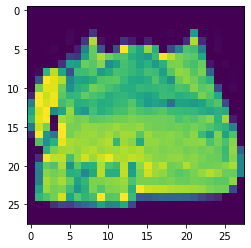

In [8]:
label_dictionnary = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 
                     3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 
                     7:'Sneaker', 8:'Bag', 9:'Ankle boot' }
def true_label(x):
    return label_dictionnary[x]
example = 100
g = plt.imshow(X_train.values.reshape(-1,28,28,1)[example][:,:,0])
print('this represent a : ' + true_label(y_train[example]))

In [134]:
knn = KNeighborsClassifier(algorithm='brute', n_jobs=-1, n_neighbors=6, p=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', n_jobs=-1, n_neighbors=6, p=1)

In [135]:
report(knn)

              precision    recall  f1-score   support

           0       0.75      0.91      0.82      1000
           1       0.98      0.97      0.98      1000
           2       0.73      0.82      0.77      1000
           3       0.91      0.88      0.90      1000
           4       0.81      0.77      0.79      1000
           5       0.98      0.89      0.93      1000
           6       0.71      0.56      0.62      1000
           7       0.89      0.96      0.92      1000
           8       0.98      0.95      0.97      1000
           9       0.92      0.95      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.86     10000
weighted avg       0.87      0.87      0.86     10000



In [136]:
from sklearn.ensemble import VotingClassifier,RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [137]:
report(rf)

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.81      0.81      1000
           3       0.89      0.93      0.91      1000
           4       0.80      0.85      0.83      1000
           5       0.98      0.95      0.96      1000
           6       0.74      0.61      0.67      1000
           7       0.92      0.93      0.93      1000
           8       0.95      0.98      0.97      1000
           9       0.93      0.95      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [155]:
x8 = X_test[y_test==6].iloc[0]
lis = x8.to_list()

In [156]:
rf.predict([lis])

/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([6])

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log_clf = LogisticRegression(max_iter=100000)
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
knn = KNeighborsClassifier(algorithm='brute', n_jobs=-1, n_neighbors=6, p=1)
voting_clf = VotingClassifier(
 estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf),('knn',knn)],
 voting='hard',max_iter=1000000)
voting_clf.fit(X_train, y_train)

/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=100000)),
                             ('rf', RandomForestClassifier()), ('svc', SVC()),
                             ('knn',
                              KNeighborsClassifier(algorithm='brute', n_jobs=-1,
                                                   n_neighbors=6, p=1))])

In [166]:
report(voting_clf)

              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1000
           1       0.99      0.98      0.98      1000
           2       0.79      0.85      0.82      1000
           3       0.90      0.92      0.91      1000
           4       0.84      0.86      0.85      1000
           5       0.97      0.95      0.96      1000
           6       0.78      0.58      0.67      1000
           7       0.91      0.95      0.93      1000
           8       0.97      0.96      0.97      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [168]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, knn,voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 0.8376
RandomForestClassifier 0.8833
SVC 0.8921
KNeighborsClassifier 0.8653


KeyboardInterrupt: 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log_clf = LogisticRegression(max_iter=100000)
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
knn = KNeighborsClassifier(algorithm='brute', n_jobs=-1, n_neighbors=6, p=1)
voting_clf = VotingClassifier(
 estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf),('knn',knn)],
 voting='soft',max_iter=1000000)
voting_clf.fit(X_train, y_train)

In [ ]:
report(voting_clf)

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)

In [ ]:
report(svm)

In [17]:
param_grid = {
    'C':np.random.randint(0.1,10,2),'kernel':['poly', 'rbf', 'sigmoid'],'degree':[2,3],
    'gamma':['scale', 'auto',1,1.5],'shrinking':[True,False],
    'class_weight':['balanced',None],'decision_function_shape':['ovo', 'ovr'],'random_state':[101]
}
model= Random(svm,param_grid,scoring='accuracy',verbose=3)

In [ ]:
model.fit(X_train,y_train)

n_iterations: 6
n_required_iterations: 8
n_possible_iterations: 6
min_resources_: 100
max_resources_: 60000
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 6400
n_resources: 100
Fitting 5 folds for each of 6400 candidates, totalling 32000 fits
[CV 1/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=scale, kernel=linear, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.600) total time=   0.0s
[CV 2/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=scale, kernel=linear, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.550) total time=   0.0s
[CV 3/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=scale, kernel=linear, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.600) total time=   0.0s
[CV 4/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=scale, ke

[CV 3/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=auto, kernel=linear, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.600) total time=   0.0s
[CV 4/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=auto, kernel=linear, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.550) total time=   0.0s
[CV 5/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=auto, kernel=linear, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=auto, kernel=linear, probability=True, random_state=101, shrinking=False;, score=(train=1.000, test=0.600) total time=   0.0s
[CV 2/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=auto, kernel=linear, probability=True, random_state=101, shrinking=Fa

[CV 4/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1, kernel=linear, probability=True, random_state=101, shrinking=False;, score=(train=1.000, test=0.550) total time=   0.0s
[CV 5/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1, kernel=linear, probability=True, random_state=101, shrinking=False;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1, kernel=poly, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.600) total time=   0.0s
[CV 2/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1, kernel=poly, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 3/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1, kernel=poly, probability=True, random_state=101, shrinking=True;, score=(train=1.

[CV 5/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.5, kernel=poly, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.700) total time=   0.0s
[CV 1/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.5, kernel=poly, probability=True, random_state=101, shrinking=False;, score=(train=1.000, test=0.600) total time=   0.0s
[CV 2/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.5, kernel=poly, probability=True, random_state=101, shrinking=False;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 3/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.5, kernel=poly, probability=True, random_state=101, shrinking=False;, score=(train=1.000, test=0.600) total time=   0.0s
[CV 4/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.5, kernel=poly, probability=True, random_state=101, shrinking=False;, score=(

[CV 1/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=2, kernel=rbf, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.050) total time=   0.0s
[CV 2/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=2, kernel=rbf, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.200) total time=   0.0s
[CV 3/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=2, kernel=rbf, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.200) total time=   0.0s
[CV 4/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=2, kernel=rbf, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.100) total time=   0.0s
[CV 5/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=2, kernel=rbf, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0

[CV 5/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=2.5, kernel=rbf, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.050) total time=   0.0s
[CV 1/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=2.5, kernel=rbf, probability=True, random_state=101, shrinking=False;, score=(train=1.000, test=0.050) total time=   0.0s
[CV 2/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=2.5, kernel=rbf, probability=True, random_state=101, shrinking=False;, score=(train=1.000, test=0.200) total time=   0.0s
[CV 3/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=2.5, kernel=rbf, probability=True, random_state=101, shrinking=False;, score=(train=1.000, test=0.200) total time=   0.0s
[CV 4/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=2.5, kernel=rbf, probability=True, random_state=101, shrinking=False;, score=(train

[CV 4/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=3, kernel=rbf, probability=True, random_state=101, shrinking=False;, score=(train=1.000, test=0.100) total time=   0.0s
[CV 5/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=3, kernel=rbf, probability=True, random_state=101, shrinking=False;, score=(train=1.000, test=0.050) total time=   0.0s
[CV 1/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=3, kernel=sigmoid, probability=True, random_state=101, shrinking=True;, score=(train=0.125, test=0.050) total time=   0.0s
[CV 2/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=3, kernel=sigmoid, probability=True, random_state=101, shrinking=True;, score=(train=0.125, test=0.150) total time=   0.0s
[CV 3/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=3, kernel=sigmoid, probability=True, random_state=101, shrinking=True;, score=(train

[CV 3/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=3.5, kernel=sigmoid, probability=True, random_state=101, shrinking=True;, score=(train=0.062, test=0.000) total time=   0.0s
[CV 4/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=3.5, kernel=sigmoid, probability=True, random_state=101, shrinking=True;, score=(train=0.062, test=0.200) total time=   0.0s
[CV 5/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=3.5, kernel=sigmoid, probability=True, random_state=101, shrinking=True;, score=(train=0.062, test=0.150) total time=   0.0s
[CV 1/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=3.5, kernel=sigmoid, probability=True, random_state=101, shrinking=False;, score=(train=0.125, test=0.050) total time=   0.0s
[CV 2/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=3.5, kernel=sigmoid, probability=True, random_state=101, shrinking=Fa

[CV 3/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=scale, kernel=sigmoid, probability=True, random_state=101, shrinking=False;, score=(train=0.450, test=0.300) total time=   0.0s
[CV 4/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=scale, kernel=sigmoid, probability=True, random_state=101, shrinking=False;, score=(train=0.500, test=0.600) total time=   0.0s
[CV 5/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=scale, kernel=sigmoid, probability=True, random_state=101, shrinking=False;, score=(train=0.575, test=0.350) total time=   0.0s
[CV 1/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=auto, kernel=linear, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.600) total time=   0.0s
[CV 2/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=auto, kernel=linear, probability=True, random_state=101, shri

[CV 2/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1, kernel=linear, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.550) total time=   0.0s
[CV 3/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1, kernel=linear, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.600) total time=   0.0s
[CV 4/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1, kernel=linear, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.550) total time=   0.0s
[CV 5/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1, kernel=linear, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1, kernel=linear, probability=True, random_state=101, shrinking=False;, score=(tra

[CV 4/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.5, kernel=linear, probability=True, random_state=101, shrinking=False;, score=(train=1.000, test=0.550) total time=   0.0s
[CV 5/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.5, kernel=linear, probability=True, random_state=101, shrinking=False;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.5, kernel=poly, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.600) total time=   0.0s
[CV 2/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.5, kernel=poly, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.550) total time=   0.0s
[CV 3/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.5, kernel=poly, probability=True, random_state=101, shrinking=True;, score

[CV 3/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=2, kernel=poly, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.550) total time=   0.0s
[CV 4/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=2, kernel=poly, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.550) total time=   0.0s
[CV 5/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=2, kernel=poly, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.600) total time=   0.0s
[CV 1/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=2, kernel=poly, probability=True, random_state=101, shrinking=False;, score=(train=1.000, test=0.600) total time=   0.0s
[CV 2/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=2, kernel=poly, probability=True, random_state=101, shrinking=False;, score=(train=1.000,

[CV 4/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=2.5, kernel=poly, probability=True, random_state=101, shrinking=False;, score=(train=1.000, test=0.550) total time=   0.0s
[CV 5/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=2.5, kernel=poly, probability=True, random_state=101, shrinking=False;, score=(train=1.000, test=0.600) total time=   0.0s
[CV 1/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=2.5, kernel=rbf, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.050) total time=   0.0s
[CV 2/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=2.5, kernel=rbf, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.200) total time=   0.0s
[CV 3/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=2.5, kernel=rbf, probability=True, random_state=101, shrinking=True;, score=(train

[CV 3/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=3, kernel=rbf, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.200) total time=   0.0s
[CV 4/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=3, kernel=rbf, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.100) total time=   0.0s
[CV 5/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=3, kernel=rbf, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.050) total time=   0.0s
[CV 1/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=3, kernel=rbf, probability=True, random_state=101, shrinking=False;, score=(train=1.000, test=0.050) total time=   0.0s
[CV 2/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=3, kernel=rbf, probability=True, random_state=101, shrinking=False;, score=(train=1.000, test

[CV 3/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=3.5, kernel=rbf, probability=True, random_state=101, shrinking=False;, score=(train=1.000, test=0.200) total time=   0.0s
[CV 4/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=3.5, kernel=rbf, probability=True, random_state=101, shrinking=False;, score=(train=1.000, test=0.100) total time=   0.0s
[CV 5/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=3.5, kernel=rbf, probability=True, random_state=101, shrinking=False;, score=(train=1.000, test=0.050) total time=   0.0s
[CV 1/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=3.5, kernel=sigmoid, probability=True, random_state=101, shrinking=True;, score=(train=0.125, test=0.050) total time=   0.0s
[CV 2/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=3.5, kernel=sigmoid, probability=True, random_state=101, shrinking=True;, score

[CV 2/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=scale, kernel=sigmoid, probability=True, random_state=101, shrinking=True;, score=(train=0.562, test=0.300) total time=   0.0s
[CV 3/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=scale, kernel=sigmoid, probability=True, random_state=101, shrinking=True;, score=(train=0.450, test=0.300) total time=   0.0s
[CV 4/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=scale, kernel=sigmoid, probability=True, random_state=101, shrinking=True;, score=(train=0.500, test=0.600) total time=   0.0s
[CV 5/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=scale, kernel=sigmoid, probability=True, random_state=101, shrinking=True;, score=(train=0.575, test=0.350) total time=   0.0s
[CV 1/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=scale, kernel=sigmoid, probability=True, random_state=101, shr

[CV 3/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=auto, kernel=sigmoid, probability=True, random_state=101, shrinking=False;, score=(train=0.062, test=0.000) total time=   0.0s
[CV 4/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=auto, kernel=sigmoid, probability=True, random_state=101, shrinking=False;, score=(train=0.062, test=0.200) total time=   0.0s
[CV 5/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=auto, kernel=sigmoid, probability=True, random_state=101, shrinking=False;, score=(train=0.062, test=0.150) total time=   0.0s
[CV 1/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1, kernel=linear, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.600) total time=   0.0s
[CV 2/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1, kernel=linear, probability=True, random_state=101, shrinking=Tru

[CV 2/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.5, kernel=linear, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.550) total time=   0.0s
[CV 3/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.5, kernel=linear, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.600) total time=   0.0s
[CV 4/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.5, kernel=linear, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.550) total time=   0.0s
[CV 5/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.5, kernel=linear, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.5, kernel=linear, probability=True, random_state=101, shrinking=False;, 

[CV 5/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=2, kernel=linear, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=2, kernel=linear, probability=True, random_state=101, shrinking=False;, score=(train=1.000, test=0.600) total time=   0.0s
[CV 2/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=2, kernel=linear, probability=True, random_state=101, shrinking=False;, score=(train=1.000, test=0.550) total time=   0.0s
[CV 3/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=2, kernel=linear, probability=True, random_state=101, shrinking=False;, score=(train=1.000, test=0.600) total time=   0.0s
[CV 4/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=2, kernel=linear, probability=True, random_state=101, shrinking=False;, score=(

[CV 4/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=2.5, kernel=linear, probability=True, random_state=101, shrinking=False;, score=(train=1.000, test=0.550) total time=   0.0s
[CV 5/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=2.5, kernel=linear, probability=True, random_state=101, shrinking=False;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=2.5, kernel=poly, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.600) total time=   0.0s
[CV 2/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=2.5, kernel=poly, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 3/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=2.5, kernel=poly, probability=True, random_state=101, shrinking=True;, score

[CV 4/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=3, kernel=poly, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.550) total time=   0.0s
[CV 5/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=3, kernel=poly, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.600) total time=   0.0s
[CV 1/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=3, kernel=poly, probability=True, random_state=101, shrinking=False;, score=(train=1.000, test=0.600) total time=   0.0s
[CV 2/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=3, kernel=poly, probability=True, random_state=101, shrinking=False;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 3/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=3, kernel=poly, probability=True, random_state=101, shrinking=False;, score=(train=1.000

[CV 4/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=3.5, kernel=poly, probability=True, random_state=101, shrinking=False;, score=(train=1.000, test=0.550) total time=   0.0s
[CV 5/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=3.5, kernel=poly, probability=True, random_state=101, shrinking=False;, score=(train=1.000, test=0.600) total time=   0.0s
[CV 1/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=3.5, kernel=rbf, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.050) total time=   0.0s
[CV 2/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=3.5, kernel=rbf, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.200) total time=   0.0s
[CV 3/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=3.5, kernel=rbf, probability=True, random_state=101, shrinking=True;, score=(train

[CV 3/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=scale, kernel=rbf, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.600) total time=   0.0s
[CV 4/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=scale, kernel=rbf, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.600) total time=   0.0s
[CV 5/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=scale, kernel=rbf, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.650) total time=   0.0s
[CV 1/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=scale, kernel=rbf, probability=True, random_state=101, shrinking=False;, score=(train=0.988, test=0.600) total time=   0.0s
[CV 2/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=scale, kernel=rbf, probability=True, random_state=101, shrinking=False;, scor

[CV 2/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=auto, kernel=rbf, probability=True, random_state=101, shrinking=False;, score=(train=1.000, test=0.200) total time=   0.0s
[CV 3/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=auto, kernel=rbf, probability=True, random_state=101, shrinking=False;, score=(train=1.000, test=0.200) total time=   0.0s
[CV 4/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=auto, kernel=rbf, probability=True, random_state=101, shrinking=False;, score=(train=1.000, test=0.100) total time=   0.0s
[CV 5/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=auto, kernel=rbf, probability=True, random_state=101, shrinking=False;, score=(train=1.000, test=0.050) total time=   0.0s
[CV 1/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=auto, kernel=sigmoid, probability=True, random_state=101, shrinking=True;, sco

[CV 2/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1, kernel=sigmoid, probability=True, random_state=101, shrinking=True;, score=(train=0.125, test=0.150) total time=   0.0s
[CV 3/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1, kernel=sigmoid, probability=True, random_state=101, shrinking=True;, score=(train=0.062, test=0.000) total time=   0.0s
[CV 4/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1, kernel=sigmoid, probability=True, random_state=101, shrinking=True;, score=(train=0.062, test=0.200) total time=   0.0s
[CV 5/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1, kernel=sigmoid, probability=True, random_state=101, shrinking=True;, score=(train=0.062, test=0.150) total time=   0.0s
[CV 1/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1, kernel=sigmoid, probability=True, random_state=101, shrinking=False;, score

[CV 3/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.5, kernel=sigmoid, probability=True, random_state=101, shrinking=False;, score=(train=0.062, test=0.000) total time=   0.0s
[CV 4/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.5, kernel=sigmoid, probability=True, random_state=101, shrinking=False;, score=(train=0.062, test=0.200) total time=   0.0s
[CV 5/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.5, kernel=sigmoid, probability=True, random_state=101, shrinking=False;, score=(train=0.062, test=0.150) total time=   0.0s
[CV 1/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=2, kernel=linear, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.600) total time=   0.0s
[CV 2/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=2, kernel=linear, probability=True, random_state=101, shrinking=True;,

[CV 2/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=2.5, kernel=linear, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.550) total time=   0.0s
[CV 3/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=2.5, kernel=linear, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.600) total time=   0.0s
[CV 4/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=2.5, kernel=linear, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.550) total time=   0.0s
[CV 5/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=2.5, kernel=linear, probability=True, random_state=101, shrinking=True;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END C=4, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=2.5, kernel=linear, probability=True, random_state=101, shrinking=False;, 

In [ ]:
model.best_estimators_

In [ ]:
report(model)

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X,y)

In [ ]:
dump(svm,'Fashion_MNIST.joblib',compress=9)